In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
bias = fits.open("D_n20131112t1127_c13_r1472p01_biascor.fits")[0].data
flat = fits.open('D_n20131112t1127_r_c13_r1472p01_dflatcor.fits')[0].data
data = fits.open('DECam_00380036_09.fits')[0].data

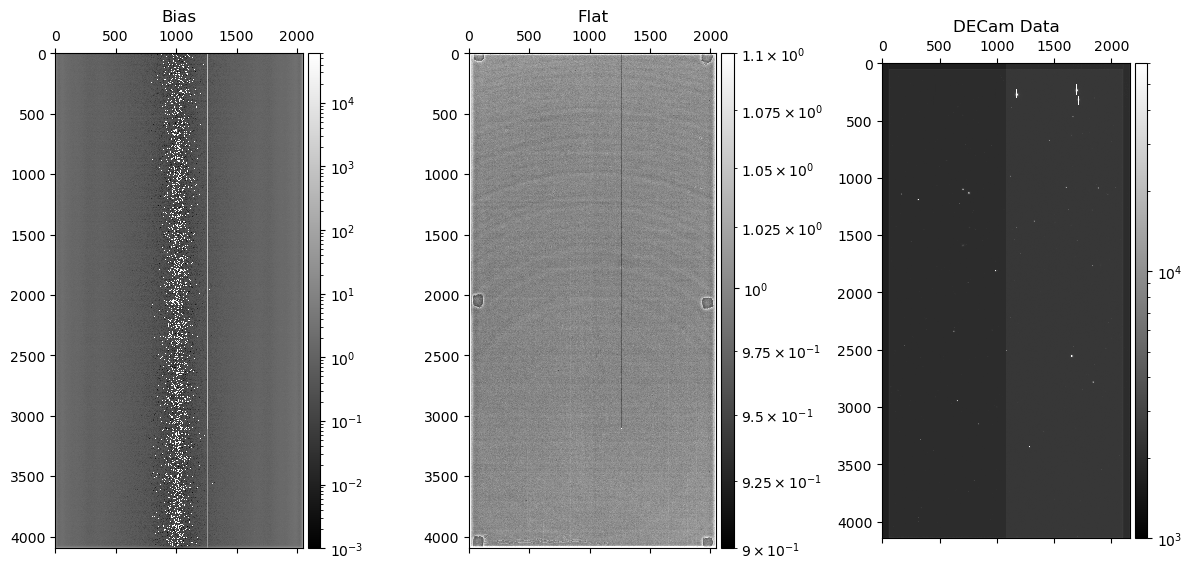

The bias image is the read noise (shutter closed with zero exposure time)
  bias nrows: 4096, bias ncols: 2048
  bias pixel value range: (-25.315977096557617, 43629.14453125) 

The flat image is the variance in response per pixel. 
  flat nrows: 4096, flat ncols: 2048
  flat pixel value range: (-0.1581370234489441, 4.153182506561279) 

The DECam image is the science frame, that is, it's the corrected response.
  data nrows: 4146, data ncols: 2160
  data pixel value range: (1702, 57876)


In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 28))


cm0 = axes[0].matshow(bias, cmap = 'gray', norm = colors.LogNorm(vmin = .001, vmax = 60000))
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
cb0 = plt.colorbar(cm0, cax = cax0)
axes[0].set_title("Bias")

cm1 = axes[1].matshow(flat, cmap = 'gray', norm = colors.LogNorm(vmin = .9, vmax = 1.1))
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(cm1, cax = cax1)
axes[1].set_title("Flat")


cm2 = axes[2].matshow(data, cmap = 'gray', norm = colors.LogNorm(vmin = 1000, vmax = 60000))
divider2 = make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cb2 = plt.colorbar(cm2, cax = cax2)
axes[2].set_title("DECam Data")

fig.tight_layout(pad = 1)
fig.savefig('images.png', dpi = 300)
plt.show()

print("The bias image is the read noise (shutter closed with zero exposure time)\n  bias nrows: {}, bias ncols: {}\n  bias pixel value range: ({}, {}) \n".format(flat.shape[0], flat.shape[1], np.min(bias), np.max(bias)))
print("The flat image is the variance in response per pixel. \n  flat nrows: {}, flat ncols: {}\n  flat pixel value range: ({}, {}) \n".format(bias.shape[0], bias.shape[1], np.min(flat), np.max(flat)))
print("The DECam image is the science frame, that is, it's the corrected response.\n  data nrows: {}, data ncols: {}\n  data pixel value range: ({}, {})".format(data.shape[0], data.shape[1], np.min(data), np.max(data)))

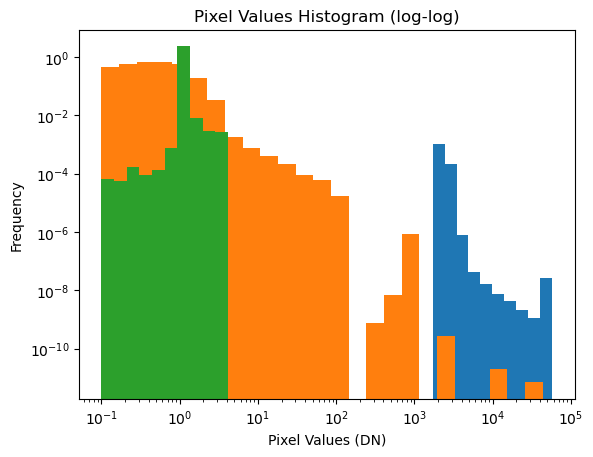

In [218]:

def plot_hist(x, bins, label):

    hist, bins = np.histogram(x, bins=bins)
    for i in range(len(bins)):
        if bins[i] <=0:
            bins[i] = .1
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, density= True, label = label)
    plt.xscale('log')
    plt.yscale('log')

plot_hist(data.flatten(), 10, "DECam")
plot_hist(bias.flatten(), 25, "Bias")
plot_hist(flat.flatten(), 10, "Flat")
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel("Pixel Values (DN)")
ax.set_ylabel("Frequency")
ax.set_title("Pixel Values Histogram (log-log)")
plt.show()